Example of how to do linearization of nonlinear system at operating point, using sympy symbolic library
The example is a synchronous machine to infinity bus in power grid

Where
- internal voltage E = 1.04 pu
- infinity bus voltage V = 1 pu, theta = 0 rad
- machine inertia H = 10 s
- machine damping D = 0.5 pu
- machine reactance Xd = 0.3 pu
- power angle delta_0 = 0.3535 rad (equilibrium)
- rotor speed omega_0 = omega_s (synchronous speed) = 2\*pi\*60 rad/s

In [1]:
import sympy as sp
from sympy import init_printing

init_printing()


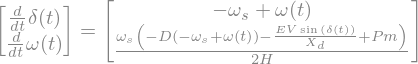

In [2]:
# Define symbols
E, V, X_d, H, D, Pm, omega_s, t = sp.symbols('E, V, X_d, H, D, Pm, omega_s, t')

delta, omega, Pe = sp.symbols('delta, omega, Pe', cls=sp.Function)

# Define the swing equation
eq1 = sp.Eq(delta(t).diff(t), omega(t) - omega_s)
eq2 = sp.Eq(omega(t).diff(t), omega_s / (2 * H) * (Pm - Pe(delta(t)) - D * (omega(t) - omega_s)))

# Represent state space equations
x = sp.Matrix([delta(t), omega(t)])
f = sp.Matrix([eq1.rhs, eq2.rhs])

# Create the vector equation
eqs = sp.Eq(x.diff(t), f)

# Print the vector equation
eqs

eqs = eqs.subs(
  {
    Pe(delta(t)): E * V * sp.sin(delta(t)) / X_d,
  }
)

eqs

Now, the linearization for a nonlineary system is just calculate the Jacobian matrix

And, to obtain the equilibrium, we let the derivtive of the states as zero, and solve the equations

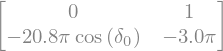

In [3]:
# Calculate the Jacobian matrix
J = eqs.rhs.jacobian(x)

J = J.subs(
  {
    E: 1.04,
    V: 1,
    X_d: 0.3,
    H: 10,
    D: 0.5,
    Pm: 1.2,
    omega_s: 2*sp.pi*60,
  }
)

# Solve for the equilibrium point
delta_0, omega_0 = sp.symbols('delta_0 omega_0')
eq_point = {delta(t): delta_0, omega(t): omega_0}
eq_equations = [eq.subs(eq_point) for eq in eqs.rhs]

# Substitute the equilibrium point into the Jacobian
J_eq = J.subs(eq_point)

J_eq

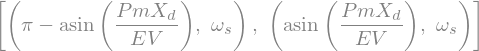

In [4]:
# Solve the equilibrium equations
equilibrium_solution = sp.solve(eq_equations, (delta_0, omega_0))

equilibrium_solution


We have two equilibrium points, and we now assign some parameters for the system to get the final numerical value:

We will explore both equilibrium points, and calculate the eigenvalues for each equilibrium point to see if this equilibrium point is stable or not.

In [5]:
params = {
  E: 1.04,
  V: 1,
  X_d: 0.3,
  H: 10,
  D: 0.5,
  Pm: 1.2,
  omega_s: 2*sp.pi*60,
}

# stable_equilibrium_solution = {
#   delta_0: 0.3535,
#   omega_0: 2*sp.pi*60,
# }

equilibrium_solution1 = {
  delta_0: equilibrium_solution[0][0],
  omega_0: equilibrium_solution[0][1],
}

# Eigenvalues
eigvals1 = J_eq.subs(equilibrium_solution1).subs(params).eigenvals()

equilibrium_solution2 = {
  delta_0: equilibrium_solution[1][0],
  omega_0: equilibrium_solution[1][1],
}

eigvals2 = J_eq.subs(equilibrium_solution2).subs(params).eigenvals()

print(f"Eigenvalues for equilibrium point 1: {eigvals1}")
print(f"Eigenvalues for equilibrium point 2: {eigvals2}")


Eigenvalues for equilibrium point 1: {4.42609859416020: 1, -13.8508765549296: 1}
Eigenvalues for equilibrium point 2: {-4.71238898038469 - 6.25289815567224*I: 1, -4.71238898038469 + 6.25289815567224*I: 1}


We can see that

the equilibrium point 1 gives eigenvalues with one in the left plane (stable), one in the right plane (unstable), thus unstable

the equilibrium point 1 gives eigenvalues with both in the left plane (stable), thus unstable
